# Polinomios de Taylor

Dada una función $f$ que sea $n$ veces diferenciable, podemos construir su polinomio de Taylor alrededor de algún punto $x_0$ de la forma

$$T_n(x)=f(x_0)+\frac{f'(x_0)}{1!}(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+\ldots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n,$$

o en expresión condensada,

$$T_n(x)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace

from numpy import exp, sin, cos
from math import factorial as fact

En general, calcular un polinomio de Taylor se reduce a conocer las primeras $n$ derivadas de una dada función. Este proceso puede ser pesado en términos de cuentas.

In [4]:
# Primer ejemplo: f(x)=e^{-x^2}

def f(x):
    return exp(-x**2)

# Definimos las tres primeras derivadas a mano

def df(x):
    return -2*x*exp(-x**2)

def d2f(x):
    return -2*exp(-x**2)+4*x**2*exp(-x**2)

def d3f(x):
    return -4*x*exp(-x**2)+8*x*exp(-x**2)-8*x**3*exp(-x**2)

Ahora se escoge un punto donde evaluar. A este punto le llamamos el *centro* de la aproximación.

In [5]:
# Definimos el punto donde aproximaremos a f

x0 = 1.

# Calculamos a mano los polinomios de Taylor de grados 0, 1, 2 y 3

def T0(x):
    return f(x0)

def T1(x):
    return T0(x)+df(x0)*(x-x0)

def T2(x):
    return T1(x)+d2f(x0)/fact(2)*(x-x0)**2

def T3(x):
    return T2(x)+d3f(x0)/fact(3)*(x-x0)**3

Al plotear observamos que los polinomios se acercan *progresivamente* a la función objetivo.

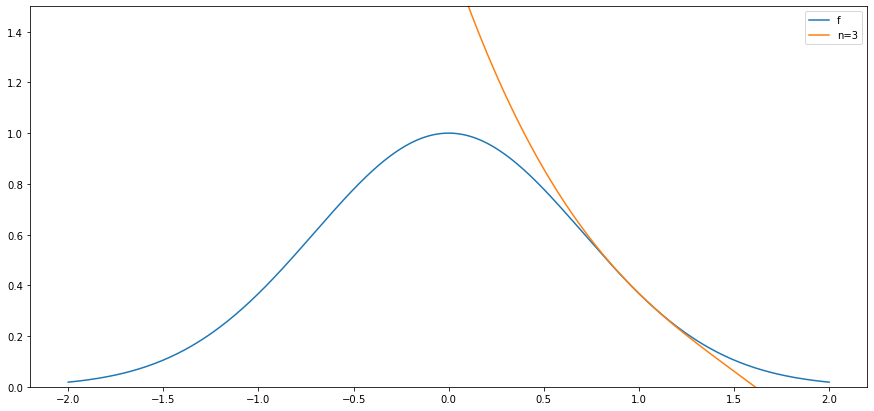

In [12]:
# Ploteo

x = linspace(-2,2,401)

p = plt.figure(figsize=(15,7))
p = plt.plot(x,f(x),label="f")
# p = plt.plot(x,len(x)*[T0(x)],label="n=0")
# p = plt.plot(x,T1(x),label="n=1")
# p = plt.plot(x,T2(x),label="n=2")
p = plt.plot(x,T3(x),label="n=3")
p = plt.ylim(0,1.5)
p = plt.legend()
# T1(x)

Si las $n$-ésimas derivadas tienen un patrón sencillo de predecir podemos hablar de calcular los polinomios arbitrarios. Un código de computadora puede entonces facilitar la tarea de escribir todos los términos involucrados.

In [13]:
# Segundo ejemplo: f(x)=sin(x)

# En este caso, las derivadas tienen una expresión regular y periódica
# Empezamos por definir una función que devuelva cualquier n-ésima derivada

def dnf(x,n):
    
    if n%4==0:
        return sin(x)
    elif n%4==1:
        return cos(x)
    elif n%4==2:
        return -sin(x)
    else:
        return -cos(x)

# Construimos una función general para calcular polinomios de Taylor
    
def Taylor(x,x0,n):
    
    a = 0.0
    
    for k in range(n+1):
        
        a = a+dnf(x0,k)/fact(k)*(x-x0)**k
        
    return a      

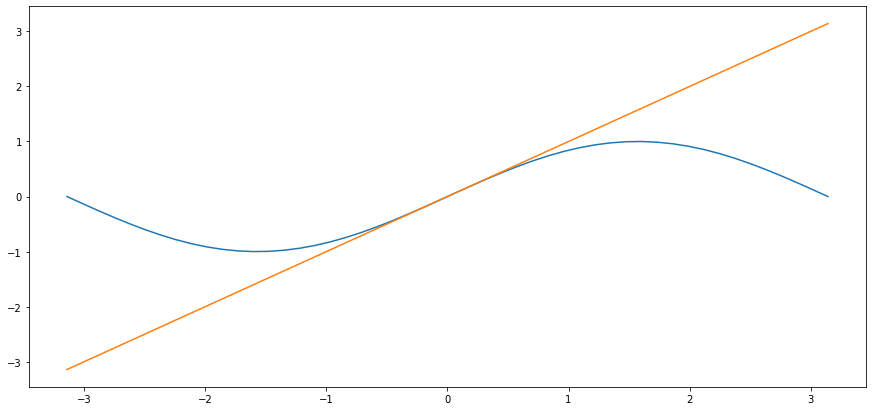

In [22]:
# Definimos el punto y el grado de la aproximación

x0 = 0.
n = 1

# Definimos una función con los anteriores argumentos fijos

def T(x):
    return Taylor(x,x0,n)

x = linspace(-np.pi,np.pi)

p = plt.figure(figsize=(15,7))
p = plt.plot(x,sin(x))
p = plt.plot(x,T(x))

Los polinomios más usados son los de las funciones elementales $\sin(x)$, $\cos(x)$, $\exp(x)$ y $\ln(x)$ alrededor de $x_0=0$. Un dato importante es que las expresiones asociadas a cada aproximación,

$$\begin{align*}
\sin(x)&\approx\sum_{k=1}^n\frac{(-1)^{k+1}x^{2k-1}}{(2k-1)!},\\
\cos(x)&\approx\sum_{k=0}^n\frac{(-1)^{k+1}x^{2k}}{(2k)!},\\
\exp(x)&\approx\sum_{k=0}^n\frac{x^k}{k!},\\
\ln(x+1)&\approx\sum_{k=1}^n\frac{(-1)^{k+1}x^k}{k},\\
\end{align*}$$

se conocían desde casi un siglo antes de que Brook Taylor desarrollara su teoría de aproximaciones.

In [27]:
# Tercer ejemplo: f(x)=e^x
# Esta función siempre tiene la misma derivada, así que podemos definir directamente el polinomio arbitrario

def f(x):
    return exp(x)

def Taylor(x,x0,n):
    a = 0.
    
    for k in range(n+1):
        
        a = a+exp(x0)/fact(k)*(x-x0)**k
    
    return a

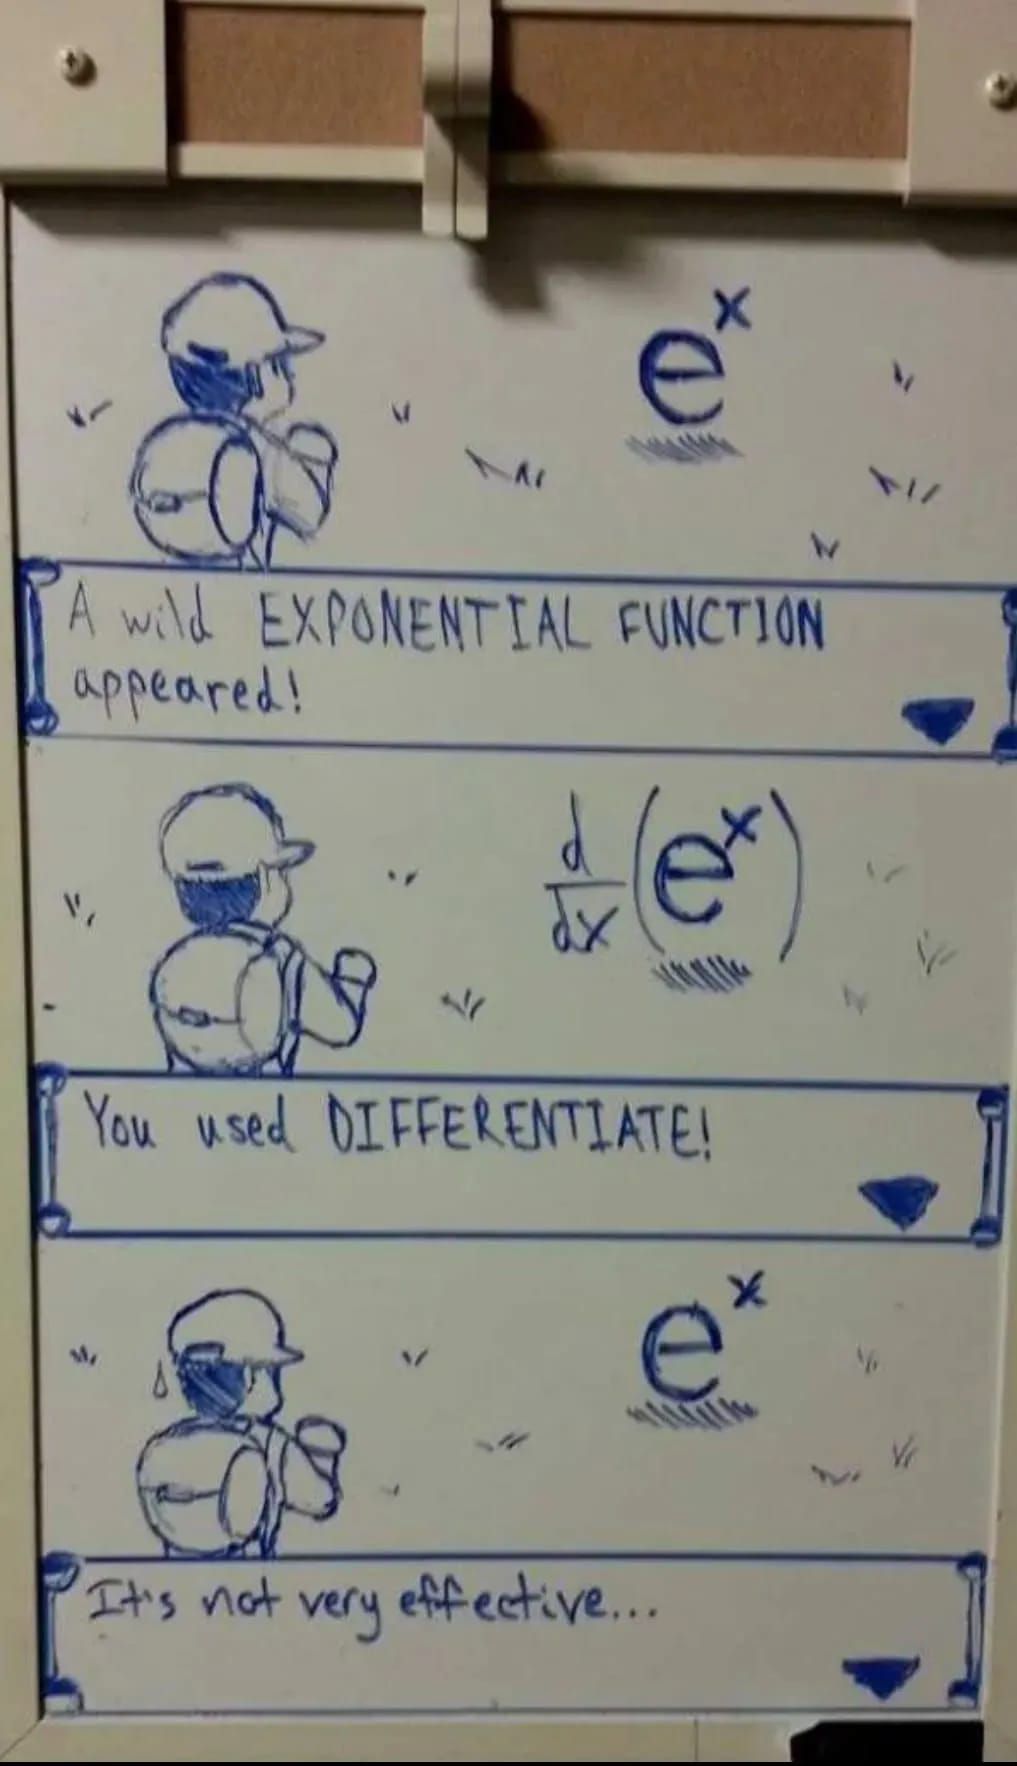

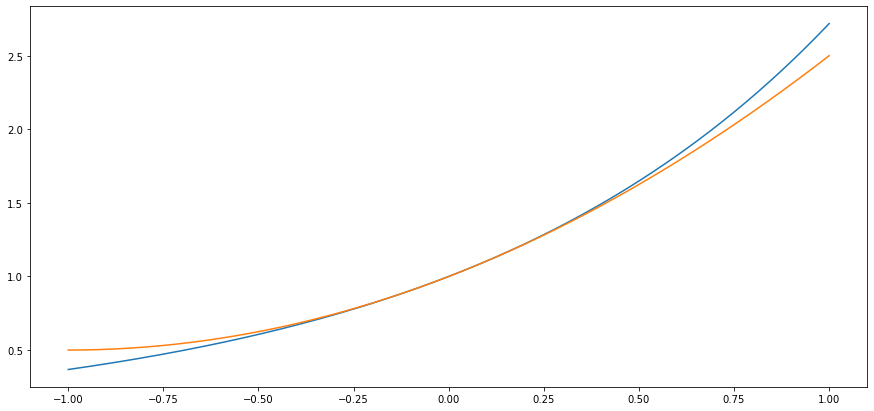

In [28]:
# Fijamos el grado y el punto

n = 2
x0 = 0.

# Función auxiliar de ploteo

def T(x):
    return Taylor(x, x0, n)

x = linspace(-1,1,201)
p = plt.figure(figsize=(15,7))
p = plt.plot(x,exp(x))
p = plt.plot(x,T(x))

Si el polinomio se acerca cada vez más a la función $f$, podemos expresar a $f$ como su **serie de Taylor**,

$$f(x)=\sum_{k=0}^{\infty}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k.$$